In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

In [3]:
react_df = pd.read_csv("data/dat_MEG_clean.txt", sep=" ")

In [6]:
react_df.head()

,Subject,Block,hand,Trial,Fan,Length,PairType,acc,RT
0,5,1,RIGHT,2,1,Short,RPFoil,1,2214
1,5,1,RIGHT,3,1,Short,Target,1,1036
2,5,1,RIGHT,4,2,Short,RPFoil,0,1170
3,5,1,RIGHT,5,1,Short,RPFoil,1,1093
4,5,1,RIGHT,6,2,Long,RPFoil,1,2139


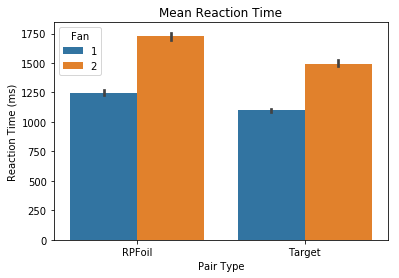

In [98]:
ax = sns.barplot(x="PairType", y="RT", hue="Fan", data=react_df)
ax.set_title("Mean Reaction Time")
ax.set_ylabel("Reaction Time (ms)")
ax.set_xlabel("Pair Type")
ax.figure.savefig("react_time.pdf", format="pdf")

In [10]:
res = react_df["acc"].groupby([react_df["Subject"], react_df["Fan"], react_df["PairType"]]).apply(lambda g: g.sum()/g.count())

In [11]:
df = pd.DataFrame(res)
df.reset_index(inplace=True)
df['err'] = 1.0-df['acc']
df.head()

,Subject,Fan,PairType,acc,err
0,5,1,RPFoil,0.954751,0.045249
1,5,1,Target,0.972603,0.027397
2,5,2,RPFoil,0.818182,0.181818
3,5,2,Target,0.876147,0.123853
4,9,1,RPFoil,0.990909,0.009091


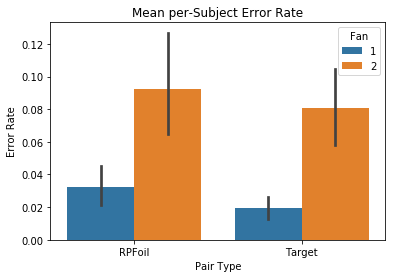

In [99]:
ax = sns.barplot(x="PairType", y="err", hue="Fan", data=df, estimator=np.mean)
ax.set_title("Mean per-Subject Error Rate")
ax.set_ylabel("Error Rate")
ax.set_xlabel("Pair Type")
ax.figure.savefig("error_rate.pdf", format="pdf")

In [77]:
arr_list = []
file_names = ("recollection_target_fan1_lh.txt",
              "recollection_target_fan2_lh.txt",
              "recollection_foil_fan1_lh.txt",
              "recollection_foil_fan2_lh.txt")
stim_types = ("Fan1", "Fan2", "RPFoil1", "RPFoil2")

In [79]:
for fn in file_names:
    with open(f"data/meg_recall/{fn}", "r") as fi:
        subj_lines = fi.readlines()

    arr_list.append(np.array([list(map(float, subj.split(","))) for subj in subj_lines]))

In [83]:
arr_list[0].shape

(18, 251)

In [91]:
import matplotlib.patches as mpatches

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


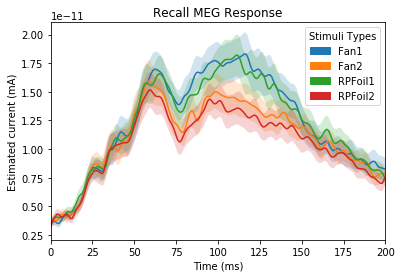

In [100]:
for a_i, arr in enumerate(arr_list):
    ax = sns.tsplot(color=f"C{a_i}", data=arr[:, 50:])

ax.set_ylabel("Estimated current (mA)")
ax.set_xlabel("Time (ms)")

leg_handles = [mpatches.Patch(color=f"C{a_i}", label=nm) for a_i, nm in enumerate(stim_types)]

plt.legend(handles=leg_handles, title="Stimuli Types")

plt.title("Recall MEG Response")
plt.savefig("recall_meg.pdf", format="pdf")

In [112]:
new_labels = [float(xtick.get_text()) for xtick in ax.get_xticklabels()]

In [113]:
new_labels

[0.0, 25.0, 50.0, 75.0, 100.0, 125.0, 150.0, 175.0, 200.0]

In [109]:
ax.set_xticklabels?

Signature: ax.set_xticklabels(labels, fontdict=None, minor=False, **kwargs)
Docstring:
Set the xtick labels with list of string labels

Parameters
----------
labels : list of str
    list of string labels

fontdict : dict, optional
    A dictionary controlling the appearance of the ticklabels,
    the default `fontdict` is:

       {'fontsize': rcParams['axes.titlesize'],
        'fontweight' : rcParams['axes.titleweight'],
        'verticalalignment': 'baseline',
        'horizontalalignment': loc}

minor : bool, optional
    If True select the minor ticklabels,
    else select the minor ticklabels

Returns
-------
A list of `~matplotlib.text.Text` instances

Other Parameters
-----------------
**kwargs : `~matplotlib.text.Text` properties.
File:      /usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py
Type:      method
